In [ ]:
# FIRST BLOCK
# Read csv file into Colaboratory:
# Refer to https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# SECOND BLOCK
downloaded = drive.CreateFile({'id':'1KFz5y4K_F9AmasDnFI3LanfBamCMn07l'})
downloaded.GetContentFile('globalterrorismdb_0718dist.csv')

In [ ]:
# THIRD BLOCK
# Load data as pandas dataframe
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head(n=5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df = df.replace('?',np.nan)
#df = df.replace('Unknown',np.nan)
df_isna = pd.isna(df)
print(df_isna.shape)
df.head(n=5)


(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
num_rows_with_excessive_na = np.sum(np.sum(df_isna,axis=1)>(df_isna.shape[1]/2))
excessive_na_row_percentage = num_rows_with_excessive_na/df_isna.shape[0]
print(excessive_na_row_percentage)
num_rows_with_excessive_na

0.8913209790248279


161945

In [ ]:
num_fields_with_excessive_na = np.sum(np.sum(df_isna,axis=0)>(df_isna.shape[0]/2))
excessive_na_field_percentage = num_fields_with_excessive_na/df_isna.shape[1]
print(excessive_na_field_percentage)
num_fields_with_excessive_na

0.5703703703703704


77

In [ ]:
field_contain_na = np.sum(df_isna,axis=0)>(df_isna.shape[1]/2)
field_key = field_contain_na.keys()
for each_key in ["iyear","gname","nkill","nwound","weaptype1_txt","nperps","individual","nkillus"]:
  if each_key in field_key:
    field_contain_na[each_key]=False
df_drop_na_field = df.loc[:,field_contain_na!=True]
print(df_drop_na_field.shape)
field_contain_na

(181691, 36)


eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [ ]:
fields_with_na = df_drop_na_field.columns[(np.sum(pd.isna(df_drop_na_field),axis=0)>0)]
print(fields_with_na)
for each_col in fields_with_na:
  print(str(each_col)+":"+str(df_drop_na_field.dtypes[each_col]))


Index(['specificity', 'doubtterr', 'multiple', 'nperps', 'nkill', 'nkillus',
       'nwound'],
      dtype='object')
specificity:float64
doubtterr:float64
multiple:float64
nperps:float64
nkill:float64
nkillus:float64
nwound:float64


In [ ]:
for each_col in fields_with_na:
  df_drop_na_field.loc[pd.isna(df_drop_na_field)[each_col],each_col] = round(np.mean(df_drop_na_field.loc[pd.isna(df_drop_na_field)[each_col]!=True,each_col]))
df_drop_na_field.head(n=5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,nperps,weaptype1,weaptype1_txt,nkill,nkillus,nwound,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,-65.0,13,Unknown,1.0,0.0,0.0,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,7.0,13,Unknown,0.0,0.0,0.0,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,Unknown,0,-65.0,13,Unknown,1.0,0.0,0.0,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,-65.0,6,Explosives,2.0,0.0,3.0,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,-65.0,8,Incendiary,2.0,0.0,3.0,1,PGIS,-9,-9,1,1


In [ ]:
object_columns = df_drop_na_field.select_dtypes(include=['object'])
object_columns.columns

Index(['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt',
       'gname', 'weaptype1_txt', 'dbsource'],
      dtype='object')

In [ ]:
df_drop_na_field.dtypes

eventid              int64
iyear                int64
imonth               int64
iday                 int64
extended             int64
country              int64
country_txt         object
region               int64
region_txt          object
specificity        float64
vicinity             int64
crit1                int64
crit2                int64
crit3                int64
doubtterr          float64
multiple           float64
success              int64
suicide              int64
attacktype1          int64
attacktype1_txt     object
targtype1            int64
targtype1_txt       object
gname               object
individual           int64
nperps             float64
weaptype1            int64
weaptype1_txt       object
nkill              float64
nkillus            float64
nwound             float64
property             int64
dbsource            object
INT_LOG              int64
INT_IDEO             int64
INT_MISC             int64
INT_ANY              int64
dtype: object

In [ ]:
#sns.set_style("whitegrid")
#sns.boxplot(data = df_drop_na_field)
#plt.show()
df = df_drop_na_field
df.head(n=5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,nperps,weaptype1,weaptype1_txt,nkill,nkillus,nwound,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,MANO-D,0,-65.0,13,Unknown,1.0,0.0,0.0,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,7.0,13,Unknown,0.0,0.0,0.0,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,Unknown,0,-65.0,13,Unknown,1.0,0.0,0.0,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,-65.0,6,Explosives,2.0,0.0,3.0,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,-65.0,8,Incendiary,2.0,0.0,3.0,1,PGIS,-9,-9,1,1


# Q1. Show the top-10 active terrorist groups (except for ‘Unknown’) from 2000. How have their activities changed over the years?  (Note: Related columns are “iyear” and “gname”. Each row represents one activity.)



## Q1 Answer

In [ ]:
Q1_df = df.loc[(df["iyear"] >= 2000)&(df["gname"]!="Unknown")]
Q1_df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,nperps,weaptype1,weaptype1_txt,nkill,nkillus,nwound,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
69835,200001010001,2000,1,1,0,139,Namibia,11,Sub-Saharan Africa,2.0,0,1,1,1,0.0,1.0,1,0,2,Armed Assault,1,Business,National Union for the Total Independence of A...,0,-65.0,5,Firearms,0.0,0.0,7.0,-9,CETIS,1,1,0,1
69836,200001010002,2000,1,1,1,139,Namibia,11,Sub-Saharan Africa,2.0,0,1,1,1,0.0,1.0,1,0,6,Hostage Taking (Kidnapping),1,Business,National Union for the Total Independence of A...,0,-65.0,5,Firearms,0.0,0.0,7.0,-9,CETIS,1,1,0,1
69837,200001010003,2000,1,1,0,92,India,6,South Asia,1.0,0,1,1,1,1.0,0.0,1,0,2,Armed Assault,3,Police,Lashkar-e-Taiba (LeT),0,-65.0,5,Firearms,1.0,0.0,2.0,-9,CETIS,1,1,0,1
69841,200001010007,2000,1,1,0,92,India,6,South Asia,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,United Liberation Front of Assam (ULFA),0,-65.0,6,Explosives,0.0,0.0,0.0,1,CETIS,0,0,0,0
69861,200001010027,2000,1,1,0,217,United States,1,North America,1.0,1,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,1,Business,Earth Liberation Front (ELF),0,4.0,8,Incendiary,0.0,0.0,0.0,1,Eco Project 2010,0,1,0,1


In [ ]:
group_count = Q1_df.loc[:,["gname","eventid"]].groupby("gname").count()
group_count.rename(columns={"eventid":"occurence"},inplace=True)
top_10 = group_count.nlargest(10,"occurence").reset_index()
print("top 10 active groups:")
top_10

top 10 active groups:


,gname,occurence
0,Taliban,7474
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Al-Shabaab,3288
3,Boko Haram,2418
4,Communist Party of India - Maoist (CPI-Maoist),1878
5,New People's Army (NPA),1794
6,Maoists,1612
7,Tehrik-i-Taliban Pakistan (TTP),1351
8,Kurdistan Workers' Party (PKK),1238
9,Revolutionary Armed Forces of Colombia (FARC),1238


In [ ]:
top_10_df = Q1_df.loc[Q1_df["gname"].isin(top_10["gname"]),["gname","eventid","iyear"]]
top_10_df.head()

,gname,eventid,iyear
69866,Revolutionary Armed Forces of Colombia (FARC),200001020004,2000
69893,Revolutionary Armed Forces of Colombia (FARC),200001070004,2000
69915,Revolutionary Armed Forces of Colombia (FARC),200001120002,2000
69916,Revolutionary Armed Forces of Colombia (FARC),200001120003,2000
69917,Revolutionary Armed Forces of Colombia (FARC),200001120004,2000


In [ ]:
top_10_df_by_gname_year = top_10_df.groupby(["gname","iyear"]).count()
top_10_df_by_gname_year.rename(columns={"eventid":"occurence"},inplace=True)
top_10_df_by_gname_year

occurence
gname                           iyear           
Al-Shabaab                      2007           6
                                2008          26
                                2009          57
                                2010          72
                                2011         164
...                                          ...
Tehrik-i-Taliban Pakistan (TTP) 2013         157
                                2014         167
                                2015         109
                                2016          95
                                2017          98

[134 rows x 1 columns]

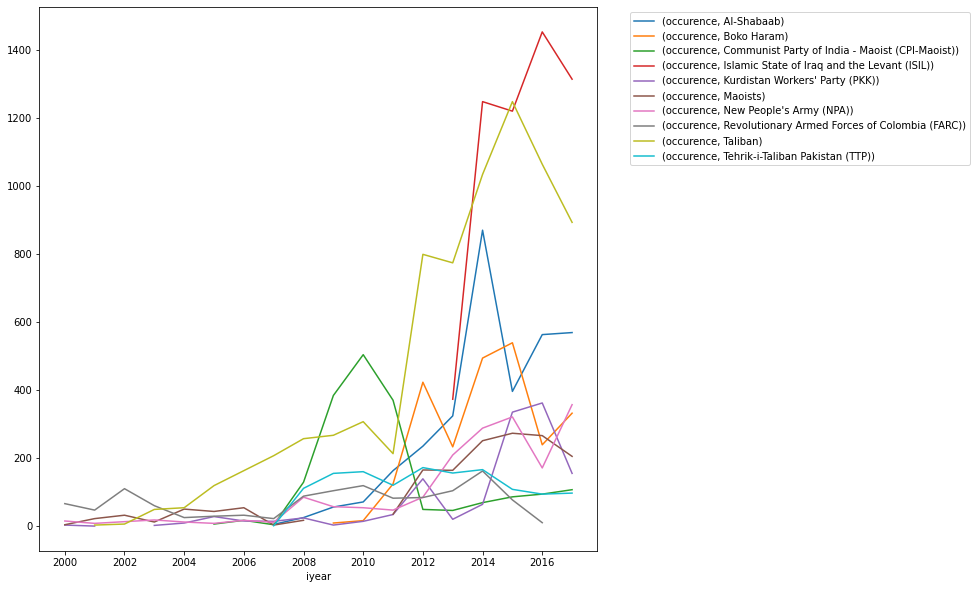

In [ ]:
from matplotlib.ticker import FuncFormatter, MaxNLocator
ax = top_10_df_by_gname_year.unstack("gname").plot(figsize=(10,10),xticks=range(Q1_df["iyear"].min(),Q1_df["iyear"].max()+1,1))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

According to the line plot, in general, the terrorist groups' activities are in slowly increasing trend in the period between 2000 and 2005, but it also comes with a rapidly increasing trend after 2010. Even though Taliban has the highest occurence of activities from the top 10 occurence diagram, ISIL has the highest increasing rate in their activities.


# Q2. Which terrorist groups caused the high total numbers of both kills and wounds for the entire recorded period (list up 3-7 groups)?  Is there linear correlation between these numbers of kills and wounds?  (Note: Again, do not include ‘Unknown’ groups when answering these questions. Use ‘nkill’ and ‘nwound’ columns.)



## Q2 Answer

In [ ]:
Q2_df = df.loc[df["gname"]!="Unknown",["nkill","nwound","gname"]]
Q2_df.head(n=5)

,nkill,nwound,gname
0,1.0,0.0,MANO-D
1,0.0,0.0,23rd of September Communist League
5,0.0,0.0,Black Nationalists
6,0.0,0.0,Tupamaros (Uruguay)
8,0.0,0.0,New Year's Gang


In [ ]:
kills_wounds_df = Q2_df.groupby(["gname"]).sum().reset_index()
kills_wounds_df.head(n=5)

,gname,nkill,nwound
0,1 May,2.0,0.0
1,14 K Triad,0.0,0.0
2,14 March Coalition,5.0,80.0
3,14th of December Command,0.0,0.0
4,15th of September Liberation Legion,0.0,1.0


In [ ]:
kills_wounds_df["total"] = kills_wounds_df["nkill"] + kills_wounds_df["nwound"]
kills_wounds_df.head(n=5)

,gname,nkill,nwound,total
0,1 May,2.0,0.0,2.0
1,14 K Triad,0.0,0.0,0.0
2,14 March Coalition,5.0,80.0,85.0
3,14th of December Command,0.0,0.0,0.0
4,15th of September Liberation Legion,0.0,1.0,1.0


In [ ]:
top_7_total_df = kills_wounds_df.nlargest(7,"total").reset_index()
print("top 7 terrorist groups causes highest total kills and wounds:")
top_7_total_df

top 7 terrorist groups causes highest total kills and wounds:


,index,gname,nkill,nwound,total
0,1535,Islamic State of Iraq and the Levant (ISIL),40017.0,33189.0,73206.0
1,3138,Taliban,29966.0,29618.0,59584.0
2,704,Boko Haram,20694.0,11411.0,32105.0
3,161,Al-Qaida,3860.0,24518.0,28378.0
4,1864,Liberation Tigers of Tamil Eelam (LTTE),11029.0,11244.0,22273.0
5,177,Al-Shabaab,10568.0,10258.0,20826.0
6,2948,Shining Path (SL),12555.0,4651.0,17206.0


top 7 total kill-wound scatter:


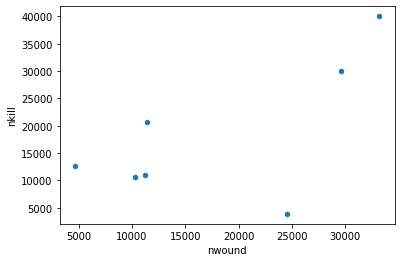

correlation coefficient:
0.6417595292555291


In [ ]:
top_7_kills_wounds_total = kills_wounds_df.loc[kills_wounds_df["gname"].isin(top_7_total_df["gname"]),["gname","nkill","nwound"]]

print("top 7 total kill-wound scatter:")
top_7_kills_wounds_total.plot.scatter(x="nwound",y="nkill")
plt.show()

print("correlation coefficient:")
print(top_7_kills_wounds_total["nwound"].corr(top_7_kills_wounds_total["nkill"]))

kill-wound scatter:


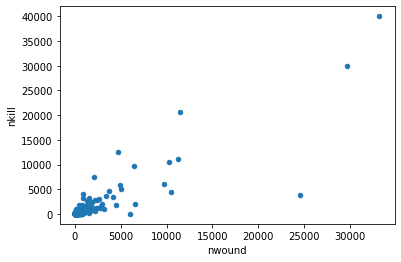

correlation coefficient:
0.8848689724861866


In [ ]:
print("kill-wound scatter:")

kills_wounds_df.plot.scatter(x="nwound",y="nkill")
plt.show()

print("correlation coefficient:")
print(kills_wounds_df["nwound"].corr(kills_wounds_df["nkill"]))

Therefore, there is a positive correlation between these numbers of wounds and kills with the data of top 7 terrorist groups, which causes the highest total(sum of wounds and kills)

# Q3. What are the common weapons used in all the terrorism attacks for the entire recorded period (list the top-3 except for ‘Unknown’)?  (Note: Use ‘weaptype1_txt’ column.)

## Q3 Answer

In [ ]:
Q3_df = df.loc[df["weaptype1_txt"]!="Unknown",["eventid","weaptype1_txt"]]
Q3_df.head(n=5)

,eventid,weaptype1_txt
3,197001000002,Explosives
4,197001000003,Incendiary
5,197001010002,Firearms
6,197001020001,Firearms
7,197001020002,Explosives


pie chart for weaptype:


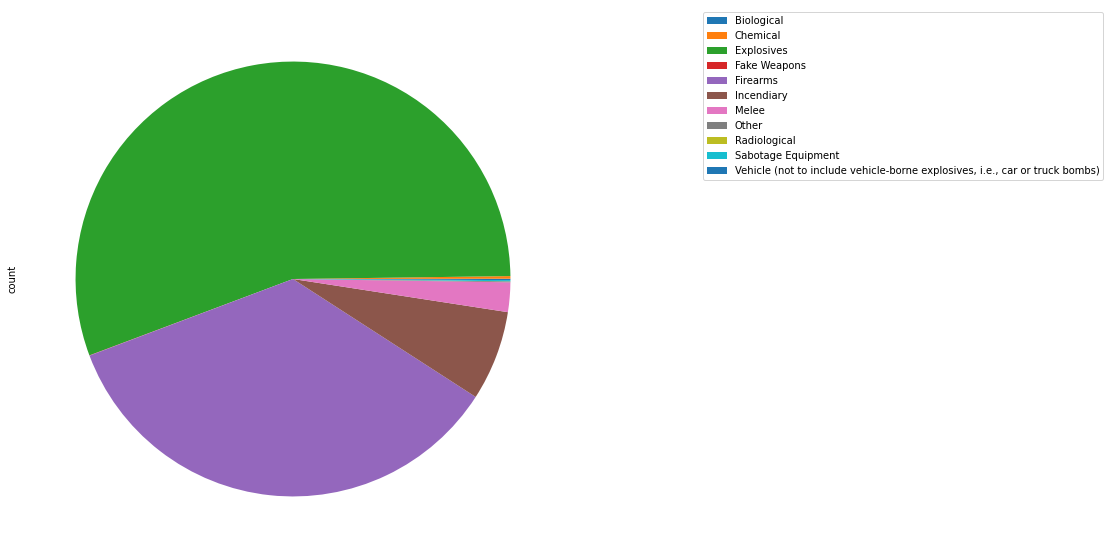

top 3 most common weapon types:
               count
weaptype1_txt       
Explosives     92426
Firearms       58524
Incendiary     11135


In [ ]:
top_3_weapton_type = Q3_df.groupby("weaptype1_txt").count()
print("pie chart for weaptype:")
top_3_weapton_type.rename(columns={"eventid":"count"},inplace=True)
top_3_weapton_type.plot.pie(y="count",figsize=(10,10),labels=[""]*top_3_weapton_type["count"].shape[0])
plt.legend(bbox_to_anchor=(2,1),labels=top_3_weapton_type["count"].index)
plt.show()
print("top 3 most common weapon types:")
print(top_3_weapton_type.nlargest(3,"count"))



# Q4. Which numerical dimensions (columns) in the dataset has the strong linear correlations?  (Note: Check columns description in Keggle (链接到外部网站。) and decide which columns should be included for correlation analysis. For example, ‘weaptype1’ is not related. Also, do not include columns that you cannot guess the meaning at all (e.g., ‘INT_LOG’). ) 

## Q4 Answer



             specificity  doubtterr  multiple  ...     nkill   nkillus    nwound
specificity     1.000000   0.041976  0.036667  ...  0.021256  0.001584  0.014937
doubtterr       0.041976   1.000000  0.046812  ...  0.041501  0.001581  0.018147
multiple        0.036667   0.046812  1.000000  ...  0.001055  0.008443  0.010727
nperps          0.009411   0.063209  0.014524  ...  0.019455  0.002020  0.009844
nkill           0.021256   0.041501  0.001055  ...  1.000000  0.421789  0.444995
nkillus         0.001584   0.001581  0.008443  ...  0.421789  1.000000  0.781188
nwound          0.014937   0.018147  0.010727  ...  0.444995  0.781188  1.000000

[7 rows x 7 columns]
-------------------------------------------------






more visualized correlation matrix:


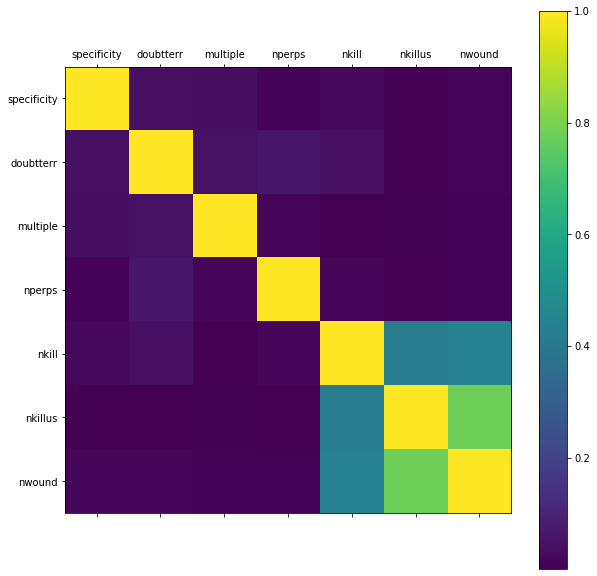

In [ ]:
Q4_df = df.loc[:, df.dtypes == np.number]
correlation_matrix = Q4_df.corr().abs()

print(correlation_matrix)
print("-------------------------------------------------")
print("\n\n\n\n\n\nmore visualized correlation matrix:")
fig = plt.figure(figsize=(10,10))
plt.matshow(correlation_matrix,fignum = fig.number)
plt.xticks(range(Q4_df.shape[1]),Q4_df.columns)
plt.yticks(range(Q4_df.shape[1]),Q4_df.columns)
color_legend = plt.colorbar()
color_legend.ax.tick_params()
plt.show()


Therefore, nkillus and nwound are with linear correlation.

# Q5. What are differences in the terrorism attacks by ‘Taliban’ and ‘Islamic State of Iraq and the Levant (ISIL)’?  (Note: This is an open question. Find any differences and discuss these differences. This should not be the same findings answered for the above questions. ) 


## Q5 Answer

ISIL major attacking country_txt distribution:


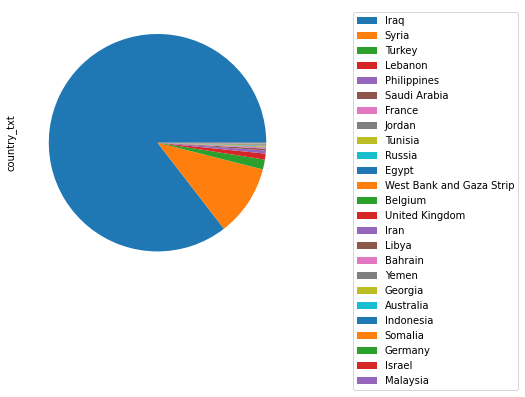

Tabliban major attacking country_txt distribution:


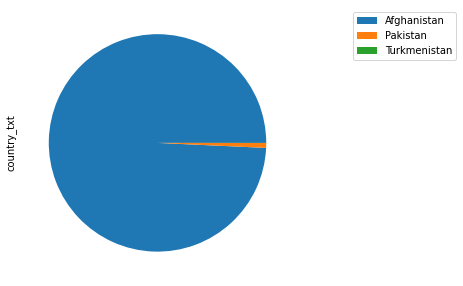



ISIL major attacking region_txt distribution:


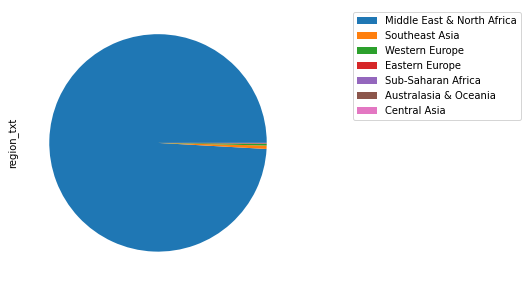

Tabliban major attacking region_txt distribution:


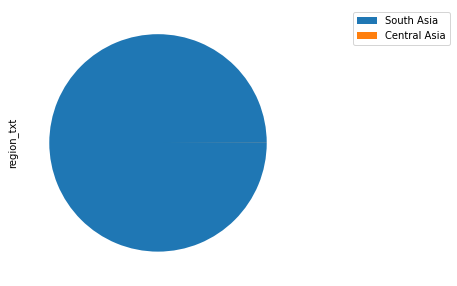



ISIL major attacking success distribution:


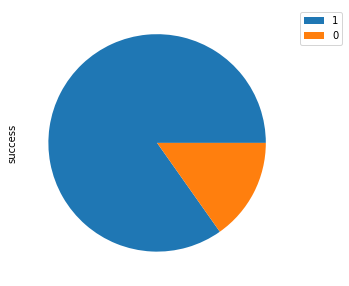

Tabliban major attacking success distribution:


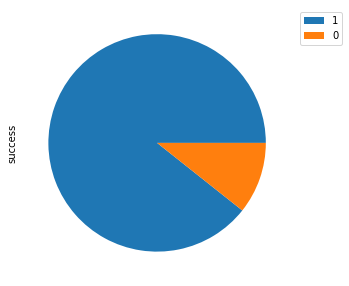



ISIL major attacking suicide distribution:


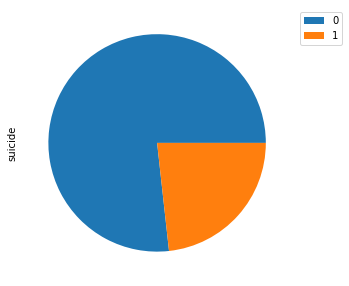

Tabliban major attacking suicide distribution:


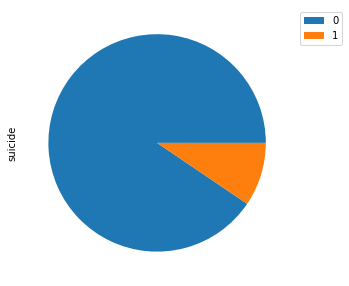



ISIL major attacking attacktype1_txt distribution:


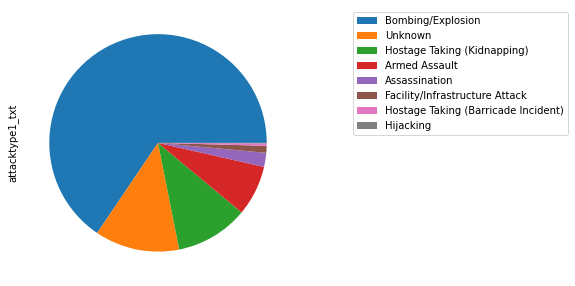

Tabliban major attacking attacktype1_txt distribution:


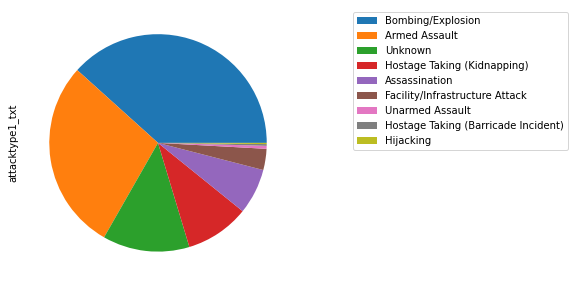



ISIL major attacking targtype1_txt distribution:


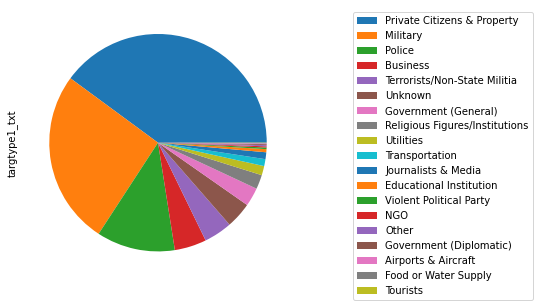

Tabliban major attacking targtype1_txt distribution:


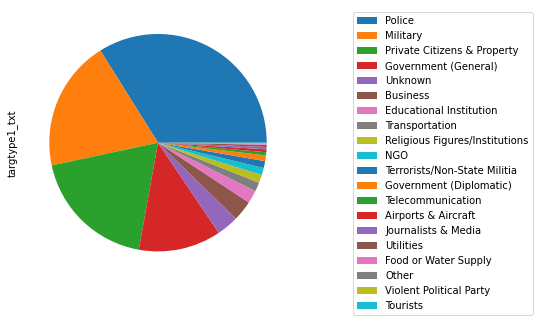



ISIL major attacking weaptype1_txt distribution:


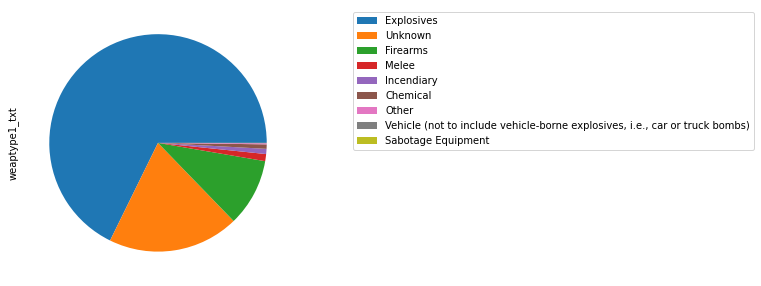

Tabliban major attacking weaptype1_txt distribution:


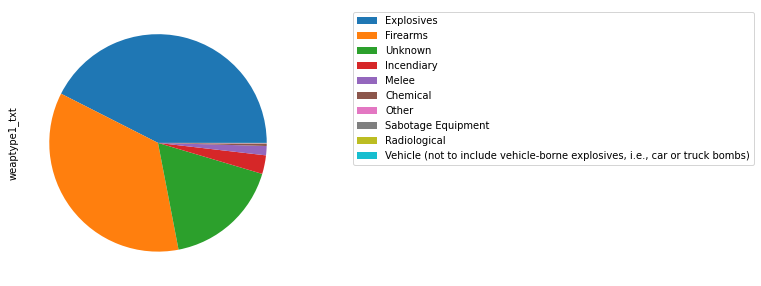

In [ ]:
Q5_df = df.loc[:,["country_txt","region_txt","success","suicide","attacktype1_txt","targtype1_txt","gname","weaptype1_txt"]]
Taliban_df = Q5_df.loc[Q5_df["gname"]=="Taliban",:]
ISIL_df = Q5_df.loc[Q5_df["gname"]=="Islamic State of Iraq and the Levant (ISIL)",:]

for each_col in Q5_df.columns:
  if each_col=="gname":
    continue
  print("ISIL major attacking "+each_col+" distribution:")
  ISIL_df[each_col].value_counts().plot.pie(figsize=(5,5),labels=[""]*ISIL_df[each_col].value_counts().shape[0])
  plt.legend(bbox_to_anchor=(1.2,1),labels=ISIL_df[each_col].value_counts().index)
  plt.show()

  print("Tabliban major attacking "+each_col+" distribution:")
  Taliban_df[each_col].value_counts().plot.pie(figsize=(5,5),labels=[""]*Taliban_df[each_col].value_counts().shape[0])
  plt.legend(bbox_to_anchor=(1.2,1),labels=Taliban_df[each_col].value_counts().index)
  plt.show()

  print("\n=====================================================================================================================\n")

  




Therefore, from the above pie charts, we can get the following differences:
1. ISIL mainly raised attacks in the region of Middle East and North Africa, especially in Iraq, and Tabliban mainly raised attacks in South Asian, especially in Afghanistan.
2. ISIL had a higher success rate than Tabliban for terrorist attacks
3. Among attacks, ISIL had a higher rate of suicide attacks than Tabliban.
4. ISIL mainly attacks private citizens and their property, and Tabliban mainly attacks police.

# Q6. What are some of the unique or interesting patterns and insights that you found from this dataset?  (Note: This is also an open question. This should not be the same findings answered for the above questions.)


## Q6 Answer


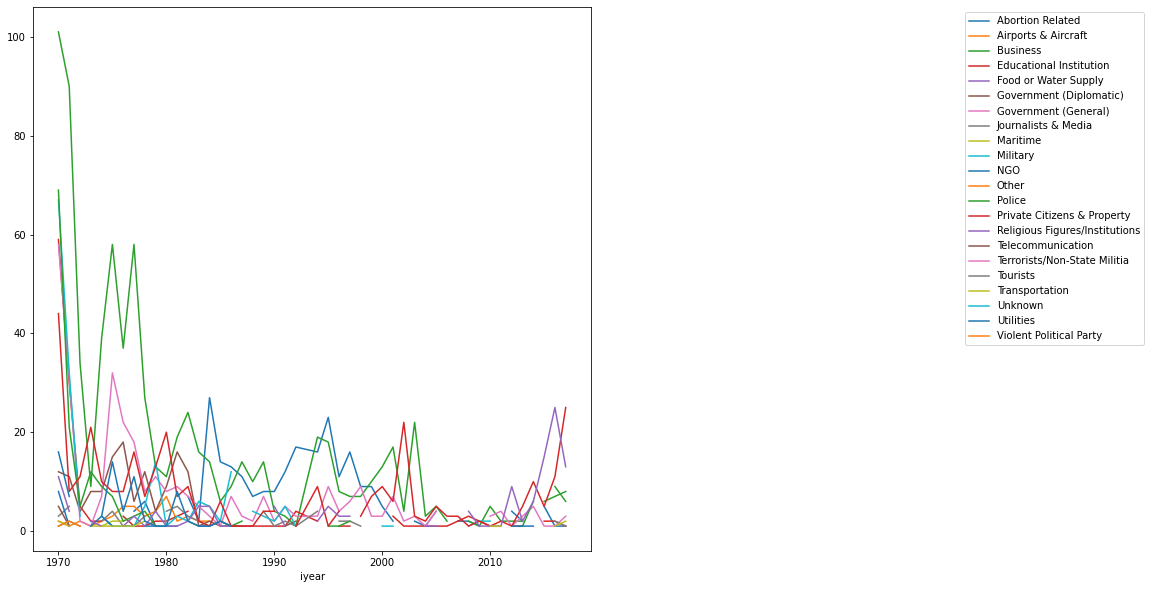

In [ ]:
Q6_df = df.loc[df["country_txt"]=="United States",["iyear","targtype1_txt"]]
Q6_df.groupby(["iyear","targtype1_txt"]).size().unstack().plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(2,1))
plt.show()

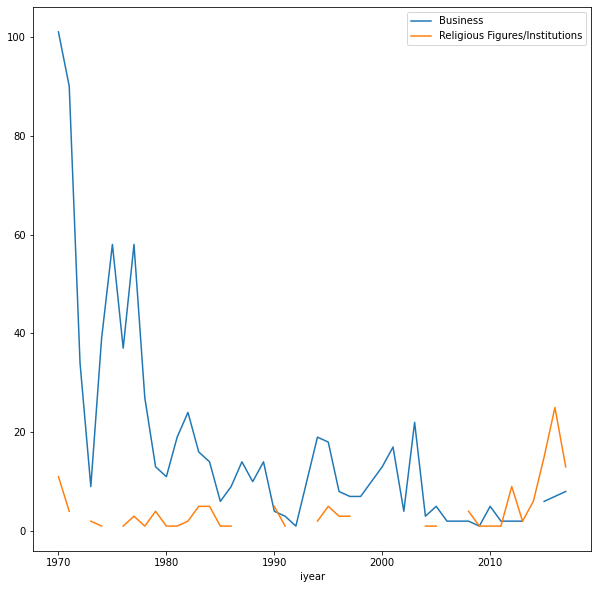

In [ ]:
Q6_df = df.loc[(df["country_txt"]=="United States")&((df["targtype1_txt"]=="Business")|(df["targtype1_txt"]=="Religious Figures/Institutions")),["iyear","targtype1_txt"]]
Q6_df.groupby(["iyear","targtype1_txt"]).size().unstack().plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Therefore, from the above visualization, my insight is that, in the past, businesses were major targets of terrorists attacks, but, as the years change, number of terrorist attacks, which targets businesses, declines while the occurences of terriost attacks on religious institutions increases. 